# Exploring Body Proportion Discrepancies between Healthy and Overweight BMI
___

## Introduction
Obesity is the fifth leading risk for global deaths with at least 2.8 million mortalities per year (European Association for the Study of Obesity, 2021). By definition, obesity is excessive fat accumulation that impairs health. While there are several methods to diagnose this, body mass index (BMI) is the most commonly used – calculated by dividing the weight in kilograms by the square of height in meters. 

BMI is popularized due to its accessibility as it only requires a patient’s weight and height. However, it is error-prone,  failing to distinguish between excess fat, muscle mass, and bone density. The golden standard for diagnosing obesity is through computerized tomography and magnetic resonance imaging that measures body fat mass, determining the body fat percentage relative to lean muscle and bone mass (Harvard School of Public Health, 2021). However, resources and equipment for this are highly expensive and often reserved for research rather than clinical application. 

The motivation for this project is to identify an alternative method to diagnose obesity while maintaining widespread accessibility. The dataset for this investigation is the Body Fat Prediction Dataset by the South Dakota School of Mines & Technology; therefore the population we will explore is South Dakotan men. This dataset includes body measurements, including the body fat percentage, of 252 men. This project will first identify which measurements have the strongest correlation to body fat percentage, pairing it with the least correlated variable. This will produce a ratio with a strong correlation to body fat percentage. 

Given that men primarily store excess fat in the abdomen, abdominal circumference is considered to have a high correlation to body fat percentage (Nauli, A. M., & Matin, S., 2019). One body measurement in the dataset that is not affected by body fat percentage is height (Juntaping, K., et al, 2017). Therefore the test statistic of interest is the abdomen circumference-to-height ratio. 

With bootstrapping, asymptotics, and confidence intervals, this project aim to use hypothesis testing and confidence intervals to determine a discrepancy between BMI classification and the abdomen circumference-to-height ratio.


**Exploration**: is there a difference between the mean abdomen circumference to height proportion between healthy and overweight men under BMI classification?

<u> Null hypothesis, $H_0$ </u>: there is no difference in the mean abdomen circumference to height proportion between men in the healthy and overweight BMI category.

<u>Alternative hypothesis, $H_A$ </u>: there is a difference in the mean abdomen circumference to height proportion between men in the healthy and overweight BMI category.

## Methods

To begin the exploration, we pick a significance level of 5%. This is the standard significance value, believed to be appropriate as the consequence of misdiagnosing whether someone is on the threshold of healthy vs obese does not have critical effects.  

In [1]:
# Installing packages. Run before continuing

install.packages("GGally")
install.packages("corrplot")
install.packages("themis")
install.packages("cowplot")
install.packages("gridExtra")
install.packages("infer")
install.packages("tidymodels")

Installing package into 'C:/Users/sanas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sanas\AppData\Local\Temp\RtmpolcN5Y\downloaded_packages


Installing package into 'C:/Users/sanas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sanas\AppData\Local\Temp\RtmpolcN5Y\downloaded_packages


Installing package into 'C:/Users/sanas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'themis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sanas\AppData\Local\Temp\RtmpolcN5Y\downloaded_packages


Installing package into 'C:/Users/sanas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'cowplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sanas\AppData\Local\Temp\RtmpolcN5Y\downloaded_packages


Installing package into 'C:/Users/sanas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sanas\AppData\Local\Temp\RtmpolcN5Y\downloaded_packages


Installing package into 'C:/Users/sanas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'infer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sanas\AppData\Local\Temp\RtmpolcN5Y\downloaded_packages


Installing package into 'C:/Users/sanas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'tidymodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sanas\AppData\Local\Temp\RtmpolcN5Y\downloaded_packages


In [2]:
# Loading all packages needed for functions below. Run this cell before continuing.
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(readr)
library(repr)
library(tidymodels)
library(RColorBrewer)
library(corrplot)
library(themis)
library(GGally)
library(cowplot)
library(lubridate)
library(dplyr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()   masks gridExtra::combine()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowset

ERROR: Error in library(devtools): there is no package called 'devtools'


For the exploration, the entire dataset (Figure 1) is loaded, filtering out NA values with na.omit() and adding another variable of interest: BMI. Again, the Center for Disease Control and Prevention (CDC) guideline is used for the formula of BMI:

\begin{equation*}
BMI = 703\frac{weight(lbs)}{height(in)^2}  \; \; \; \; \; \; \; \;  \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \;  \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \;   (1)
\end{equation*}

*Note: this formula uses empirical measurements as that was what was used in the dataset*

In [3]:
#loading data
bodyfat <- read.csv("https://raw.githubusercontent.com/sanash43/BodyFat-Analysis-R-Project/main/bodyfat.csv")

head(bodyfat)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


**Figure 1:** original bodyfat dataset

In [4]:
# adding the new BMI variable as a column to the dataset, using the Weight and Height data to calculate the BMI as seen in (1). 
# using na.omit() we filter out all NA values 

bmi <- bodyfat |>
       na.omit() |>
       mutate(BMI = 703 * Weight/(Height^2))

# we convert height, originally measured in inches, to centimeters with the multiplication factor of 2.54, which is the conversion rate of inches to centimeters
bmi <- bmi |> mutate(Height = Height * 2.54)

Part of the exploration involves confirming correlations between chosen variables. In this case, with cor(), a dataframe with the correlation r-values between all variables in the bodyfat dataset is generated, rounded to 2 decimals with round(2). It is not critical to see anything beyond 2 decimals here, so it is rounded for simplicity. 

In [5]:
# checking body measurements' correlation r-value to bmi to visualize and identify variables that might be useful for the purpose of this investigation
# the correlation r-values are rounded to 2 decimal points

correlation <- cor(bmi) |> round(2)

Here, a correlation visualization is loaded such that we could explicitly see strong and weak relations through an organized, color-coded table (Figure 2). A moderate correlation between abdomen circumference, body fat, and BMI is observed. The variable with lowest relation to abdomen circumference was height, implying height is invariable, a fact widely known. Therefore height serves as a good point of reference to abdomen circumference, leading to our choice of exploring the ratio between abdomen and height measurements.

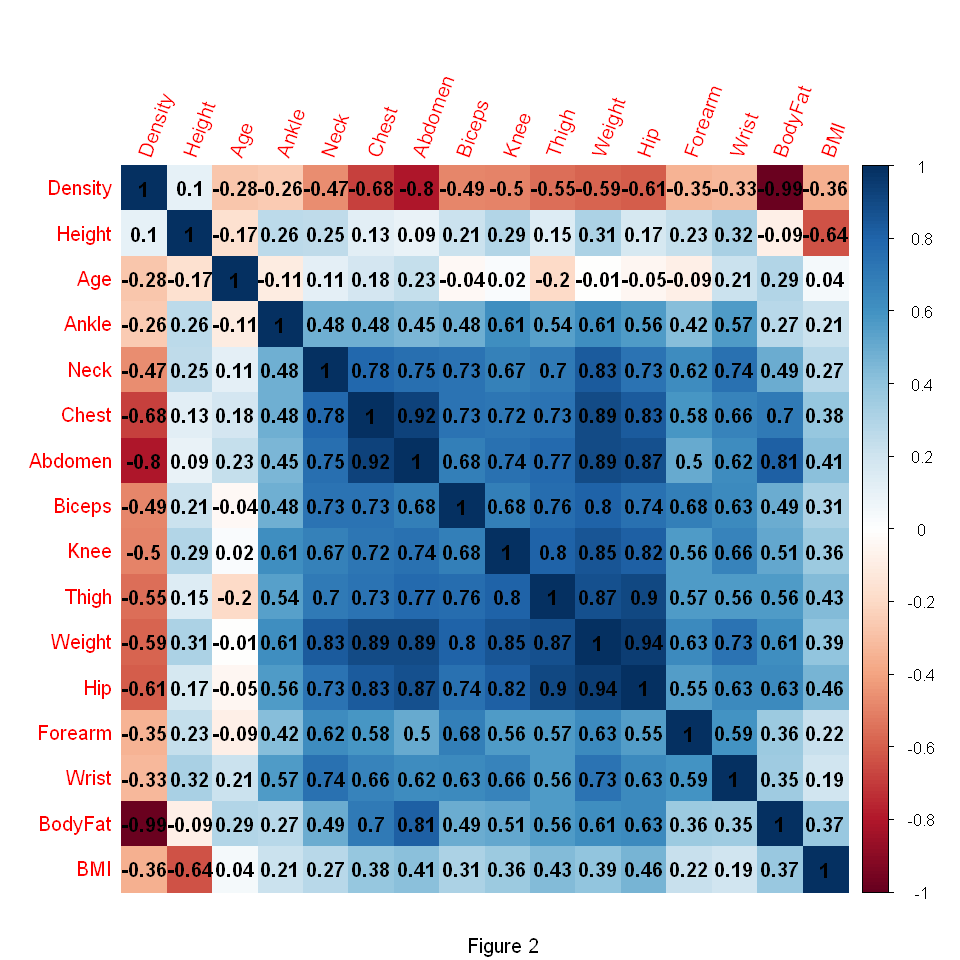

In [6]:
# resized size of plots for more effective visualization
options(repr.plot.width = 8, repr.plot.height = 8)

# plotted a color-coded correlation chart for all variables in the dataset
corrplot(correlation, method = 'color', order = 'hclust', addCoef.col = 1,  
       tl.cex = 1, number.cex = 1, tl.srt= 70)

title(sub= "Figure 2")

We use an ifelse() function to classify individuals in the dataset as Underweight, Healthy, Overweight, or based on their BMI per the CDC (Figure 3).

|   Category  |        BMI       |
|-------------| -----------------|
| Underweight |      < 18.5      |
| Healthy     | 18.5 <= BMI < 25 |
| Overweight  |  25 <= BMI < 30  |
| Obese       |       > 30       |
**Figure 3**: BMI bounds for different weight categories


To find the abdomen circumference to height proportion, height is first converted from inches to centimeters, then the abdomen measurement by this value, naming the new variable “abodmen_height_prop” (Figure 4). A new variable, "Category", is added where each individual is classified according to the bounds in Figure 3.

In [7]:
#adding the abdomen circumference to height proportion as a variable in the dataframe

bmi <- bmi |>
    mutate(abdomen_height_prop = Abdomen/Height)

#bmi categorization

bmi$Category <- ifelse(bmi$BMI < 18.5, "Underweight",
                       ifelse(bmi$BMI < 25, "Healthy",
                              ifelse(bmi$BMI < 30, "Overweight",
                                     ifelse(bmi$BMI > 30, "Obese",0))))
head(bmi)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,abdomen_height_prop,Category
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1.0708,12.3,23,154.25,172.085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.62446,0.4951042,Healthy
2,1.0853,6.1,22,173.25,183.515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.33205,0.4522791,Healthy
3,1.0414,25.3,22,154.00,168.275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.66632,0.5223592,Healthy
4,1.0751,10.4,26,184.75,183.515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.88078,0.4708062,Healthy
5,1.0340,28.7,24,184.25,180.975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.51485,0.5525625,Overweight
6,1.0502,20.9,24,210.25,189.865,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8,26.45263,0.4971954,Overweight


**Figure 4:** modified bmi dataset, including the new variables, abdomen_height_prop and Category

Using the group_by and summarize functions, we see in Figure 5 that the  categories of interest, Healthy and Overweight men, are moderately large samples of size 124 and 102, respectively.  According to the United States Census Bureau, there were approximately 442,948 men in South Dakota’s 2020 count; thus we consider this sample to be independent and less than 10% of the population. Assuming that the men sampled were random, the requirements for the Central Limit Theorem have been met. 

In [8]:
# summarizing the number of observations in each BMI category in the bmi dataset

bmi_count <- bmi |> group_by(Category) |> summarize(n=n())
bmi_count

Category,n
<chr>,<int>
Healthy,124
Obese,25
Overweight,102
Underweight,1


**Figure 5**: number of observations for each weight group in the bmi dataset

To isolate for categories of interest, we filter out the overweight and healthy men in our sample.

In [9]:
#filtering dataframe to only include observations in the Healthy and Overweight BMI Category

bmi_filtered <- bmi |>
    filter(Category %in% c("Healthy", "Overweight")) |>
    select(Category, Height, Abdomen, abdomen_height_prop)

To help visualize our question, we make a boxplot (Figure 6) of the abdomen circumference to height proportion, to compare between the overweight and healthy BMI categories. A large difference in the sample means of roughly 0.06 is observed from this plot, however the plot is not evidence enough to make any statement about the hypotheses. 

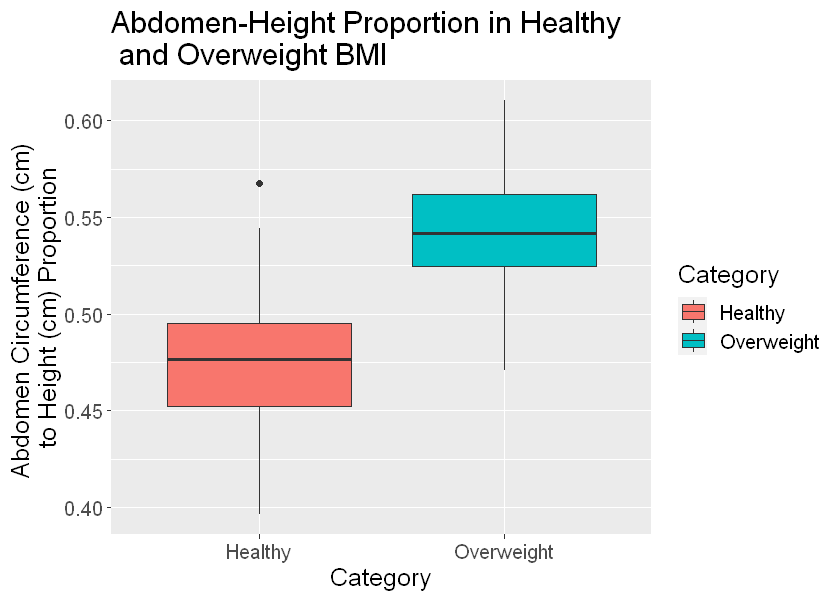

In [10]:
# plotting a boxplot comparing the abdomen circumference to height proportion between men in the Healthy and Overweight BMI Category

# plot is readjusted for effective visualization
options(repr.plot.width = 7, repr.plot.height = 5)

boxplots <- 
    bmi_filtered |>
    ggplot(aes(x = Category, y = abdomen_height_prop, fill=Category)) +
    ggtitle("Abdomen-Height Proportion in Healthy\n and Overweight BMI") +
    geom_boxplot() +
    ylab("Abdomen Circumference (cm) \nto Height (cm) Proportion") +
    theme(text = element_text(size = 15)) 

boxplots

**Figure 6:** boxplot comparing abdomen-height proportion between healthy and overweight observations

For the purpose of this investigation, we will be treating the subset of men in the healthy BMI category and the subset of men in the overweight BMI category as two different groups. In the original dataset, there are 124 healthy BMI observations and 102 overweight BMI classifications. In order to fairly compare the two groups, two random samples from the dataset are collected, each of size 100: one sample is composed of men with a healthy BMI (Figure 7), and the other is men with an overweight BMI (Figure 8). 

In [11]:
# collecting a random sample of 100 observations for healthy BMI observations and overweight BMI observations respectively. A seed of 100 is set in order to ensure the same results
# are produced each time the function is run. This is to ensure for consistency when referring to values in the written portions of this report.

set.seed(100)

healthy_sample <- bmi_filtered |>
    filter(Category == "Healthy") |>
    sample_n(size = 100)
    # labs(sub = 'Figure 7: Healthy BMI sample with 100 observations')


overweight_sample <- bmi_filtered |>
    filter(Category == "Overweight") |>
    sample_n(size = 100) 
    # labs(sub = "Figure 8: Overweight BMI sample with 100 observations")


head(healthy_sample)
# head(overweight_sample)

,Category,Height,Abdomen,abdomen_height_prop
,<chr>,<dbl>,<dbl>,<dbl>
1,Healthy,180.340,93.1,0.5162471
2,Healthy,181.610,88.1,0.4851054
3,Healthy,184.785,78.0,0.4221122
4,Healthy,175.895,88.7,0.5042781
5,Healthy,170.815,82.8,0.4847349
6,Healthy,166.370,75.0,0.4508024


**Figure 7:** Healthy BMI sample with 100 observations

In [12]:
head(overweight_sample)

,Category,Height,Abdomen,abdomen_height_prop
,<chr>,<dbl>,<dbl>,<dbl>
1,Overweight,182.880,100.0,0.5468066
2,Overweight,173.990,93.0,0.5345135
3,Overweight,167.005,98.3,0.5886051
4,Overweight,184.150,98.0,0.5321749
5,Overweight,178.435,102.4,0.5738784
6,Overweight,193.040,90.9,0.4708869


**Figure 8**: Overweight BMI sample with 100 observations

Plotting the sample distribution of abdomen and height measurements of each category:

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


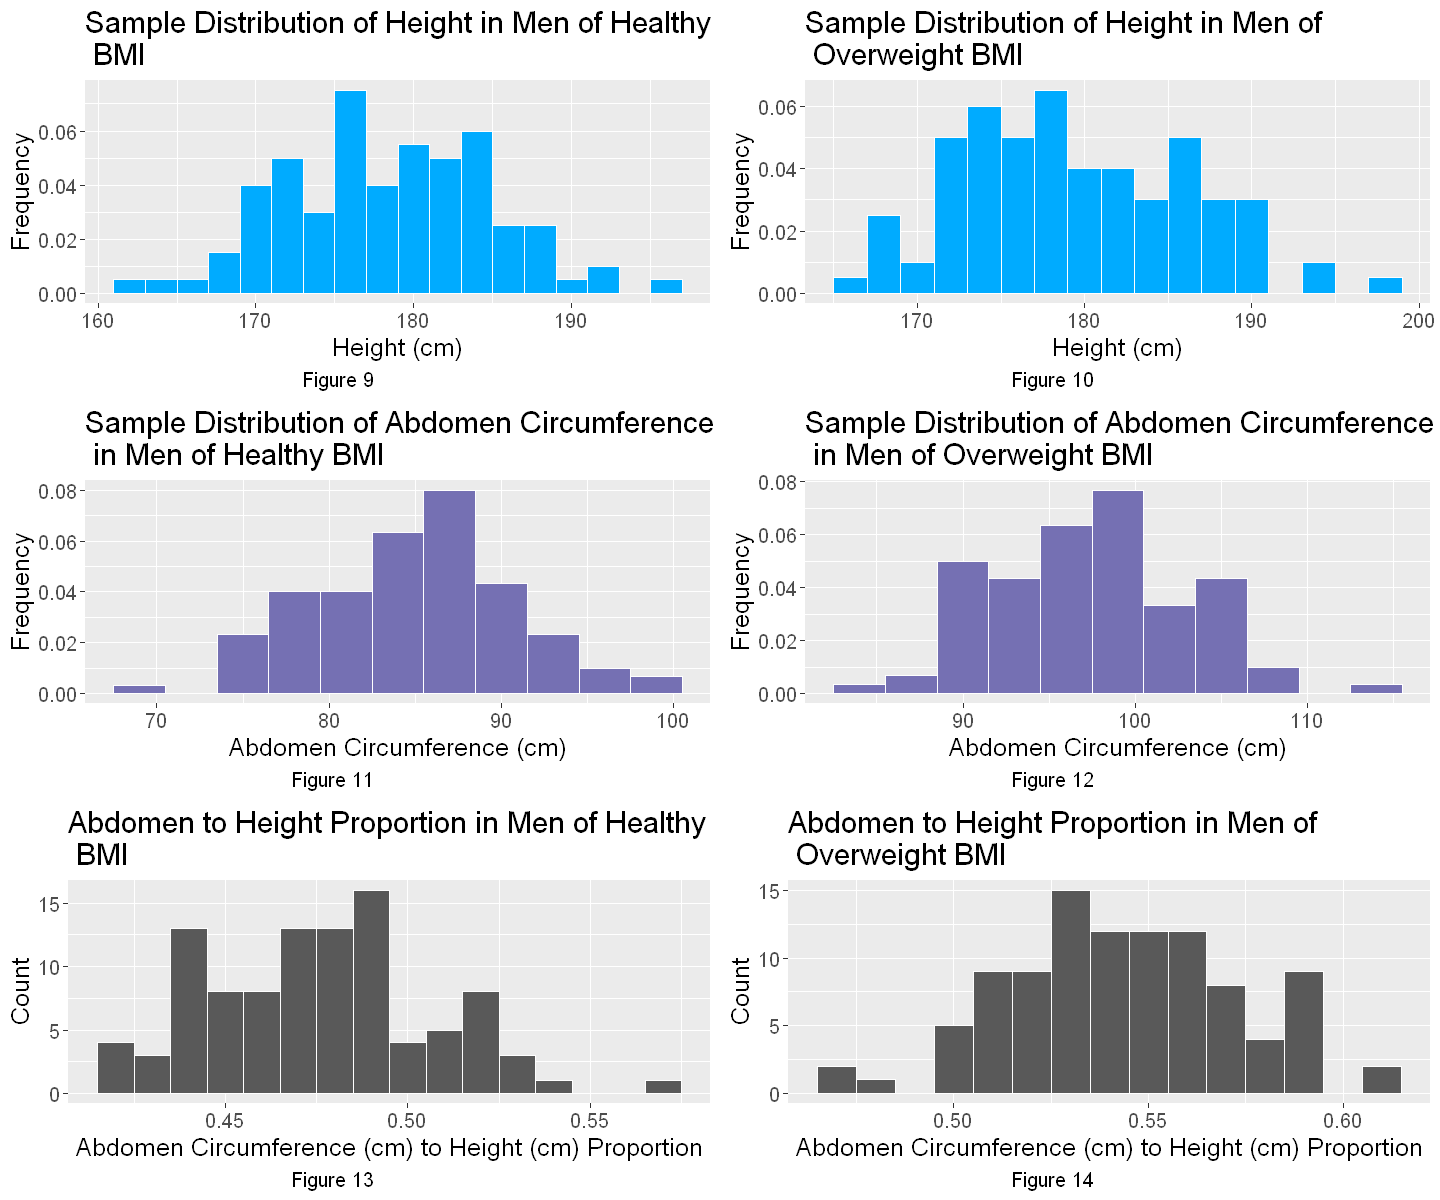

In [13]:

healthy_height_plot <- healthy_sample |>
    ggplot() +
    geom_histogram(aes(x = Height, y = ..density..), binwidth = 2, color = 'white', fill = "#00abff") +
    labs(x = "Height (cm)", y = "Frequency", caption = "Figure 9                                                        ") +
    ggtitle("Sample Distribution of Height in Men of Healthy \n BMI") +
    theme(text = element_text(size = 15)) 

overweight_height_plot <- overweight_sample |>
    ggplot() +
    geom_histogram(aes(x = Height, y = ..density..), binwidth = 2, color = 'white', fill = "#00abff") +
    labs(x = "Height (cm)", y = "Frequency", caption = "Figure 10                                                        ") +
    ggtitle("Sample Distribution of Height in Men of \n Overweight BMI") +
    theme(text = element_text(size = 15)) 

#constructing a histogram for the abdomen circumference of men in both the Healthy and Overweight BMI Category

healthy_abdomen_plot <- healthy_sample |> 
    ggplot() + 
    geom_histogram(aes(x=Abdomen, y= ..density..), binwidth = 3, color = 'white', fill = "#7570b3") +
    labs(x = "Abdomen Circumference (cm)", y = "Frequency", caption = "Figure 11                                                        ") +
    ggtitle("Sample Distribution of Abdomen Circumference \n in Men of Healthy BMI") +
    theme(text = element_text(size = 15))

overweight_abdomen_plot <- overweight_sample |> 
    ggplot() + 
    geom_histogram(aes(x=Abdomen, y= ..density..), binwidth = 3, color = 'white', fill = "#7570b3") +
    labs(x = "Abdomen Circumference (cm)", y = "Frequency", caption = "Figure 12                                                        ") +
    ggtitle("Sample Distribution of Abdomen Circumference \n in Men of Overweight BMI") +
    theme(text = element_text(size = 15))

#constructing a histogram for the abdomen circumference to height proportion of men in both the Healthy and Overweight BMI Category

prop_dist_healthy <- healthy_sample |>
    ggplot() +
    geom_histogram(aes(x = abdomen_height_prop, y = ..density..), color = "white", binwidth = 0.01) +
    theme(text = element_text(size = 15)) +
    labs(x = "Abdomen Circumference (cm) to Height (cm) Proportion", y = "Count", caption = "Figure 13                                                        ")+
    ggtitle( "Abdomen to Height Proportion in Men of Healthy \n BMI") 
    # geom_line(data = data_normal, aes(abdomen_height_prop, density), color = "red", lwd = 2)

prop_dist_overweight <- overweight_sample |>
    ggplot() +
    geom_histogram(aes(x = abdomen_height_prop, y = ..density..), color = "white", binwidth = 0.01) +
    theme(text = element_text(size = 15)) +
    labs(x = "Abdomen Circumference (cm) to Height (cm) Proportion", y = "Count", caption = "Figure 14                                                        ") +
    ggtitle("Abdomen to Height Proportion in Men of \n Overweight BMI") 

# plot is resized for effective visibility 
options(repr.plot.width = 12, repr.plot.height = 10)


# the healthy and overweight category plots for the three variables of interest are combined for ease of the reader

all_panel <- plot_grid(healthy_height_plot, overweight_height_plot, 
                       healthy_abdomen_plot, overweight_abdomen_plot,
                       prop_dist_healthy, prop_dist_overweight,
                       ncol = 2)

all_panel

 We observe a unimodal curve for the abdomen distributions in both overweight and healthy groups (Figure 11 and Figure 12), as well as for the abdomen-height proportion in the healthy group (Figure 13). We observe a more bimodal curve for the height distributions in both the healty and overweight groups (Figure 9 and Figure 10), as well as for the abdomen-height proportion in the overweight group (Figure 14). The distribution of height in men of overweight BMI is slightly positively skewed (Figure 10). The distribution of abdomen circumference in men of healthy BMI (Figure 11) is slightly negatively skewed.The distribution of the abdomen to height proportion in men of healthy BMI is also slightly positively skewed. These points could be a weakness for the accuracy of the methods used below as they have the condition of a normal distribution for the variables of interest. Still, the variables of interest have a roughly normal distribution, thus it is assumed that we may use the CLT, qualifying this sample to conduct hypothesis tests with the t-distributions.

## Asymptotics

First, we calculate the observed test statistic for both samples (Figure 15), which is the mean of the abdomen_height_prop variable. 

In [14]:
# here we calculate the observed test statistic, which is the mean abodmen circumference to height proportion (abodmen_height_prop) for men in the Healthy and Overweight BMI
# category, respectively

obs_test_stat <- bmi_filtered |>
    group_by(Category) |>
    summarise(mean_prop = mean(abdomen_height_prop))

obs_test_stat

Category,mean_prop
<chr>,<dbl>
Healthy,0.4762725
Overweight,0.5434341


**Figure 15:** observed test statistics for the Healthy and Overweight BMI category

Using the built-in t.test function of R, a 2 sample t-test of difference in means is conducted (Figure 16), retrieving a p-value of 4.069488e-37. Considering this is extremely small compared to the significance level of 5%, we may reject the null hypothesis and are prone to a Type 1 error. The 95% confidence interval computed is [0.05923747, 0.075918]. **Interpretation**: we are 95% confident that the population parameter is between this range. We observe that 0 is not in this range. Therefore we have strong supporting evidence to reject the null. 

In [15]:
# Asymptotics: using a built-in t.test function to find the difference in means 
# We can use the t-distribution because we see that the data distribution for Healthy and Overweight men are roughly normal

#conducting t.test regarding difference in abdomen circumference to height proportion. We are assuming the null is mu = 0

t_test <- tidy(t.test(x = overweight_sample$abdomen_height_prop,
                      y = healthy_sample$abdomen_height_prop,
                      mu=0,
                      alternative = "two.sided"))

t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.06757773,0.5433454,0.4757676,15.88078,4.069488e-37,197.1381,0.05918595,0.07596952,Welch Two Sample t-test,two.sided


**Figure 16**: 2 sample t-test results

In [16]:
# Conducting a 95% confidence interval for the difference of means (mean of abdomen circumference to height proportion) between the overweight and healthy BMI groups

healthy <- healthy_sample$abdomen_height_prop

overweight <- overweight_sample$abdomen_height_prop

diff_means_ci <-  tibble (
        lower_ci = mean(overweight) - mean(healthy) - qnorm(0.975) * sqrt(var(overweight)/length(overweight) + var(healthy)/length(healthy)),
        upper_ci = mean(overweight) - mean(healthy) + qnorm(0.975) * sqrt(var(overweight)/length(overweight) + var(healthy)/length(healthy))
    )
    
diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.05923747,0.075918


**Figure 17**: 95% confidence interval for the difference in means between Healthy and Overweight BMI categories

## Bootstrapping

Given that the data available is just a sample, we bootstrap the healthy and overweight data subsets (Figure 17) in order to construct a confidence interval and standard error for our test statistic. For the sake of consistency, we set seed to 100 to generate the same result each time the function is loaded. Using the infer package, we bootstrap each subset, with 10,000 replications. The test statistic is the mean of the “abdomen_height_prop” variable. In addition, the infer package to generate a 95% confidence interval for the bootstrap for both samples (Figure 18). 

In [17]:
# Using the infer package, bootstrap the mean abdomen circumference to height proportion in the healthy_sample data subset.
# Set the seed to 100 so that results are replicable each time the function in run to ensure consistency when the values are referred to in the written parts

set.seed(100)

samp_dist_mean_prop_healthy <- healthy_sample |>
    specify(response = abdomen_height_prop) |>
    generate(type = "bootstrap", reps = 10000) |>
    calculate(stat = "mean")

head(samp_dist_mean_prop_healthy)

replicate,stat
<int>,<dbl>
1,0.4762506
2,0.4731725
3,0.4753825
4,0.4799758
5,0.4708938
6,0.4746947


**Figure 17**: healthy BMI group bootstrapped samples, sorted by replicate

In [18]:
# Using the infer package, generate the 95% confidence interval for the mean abdomen circumference to height proportion from samp_dist_mean_prop_healthy
healthy_bootstrapped_ci <- samp_dist_mean_prop_healthy |>
    get_ci()

healthy_bootstrapped_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.469731,0.4817741


**Figure 18**: 95% confidence intervals for the healthy bootstrapped samples

The distribution of the test statistic for each bootstrapped sample is visualized (Figure 19 and Figure 22), shading the confidence interval in red as well as including vertical lines to indicate the bounds of the confidence interval and where the observed test statistic lies in the distribution. Both distributions were normal and unimodal, and the observed test statistic was around the peak of each distribution. The mean abdomen circumference to height proportion for both of the bootstrapped samples is obtained, and we calculate the difference of means between the two groups with a 95% confidence interval (Figure 23), which was [0.05923747, 0.075918]. I interpret this as being 95% confident that the population parameter is within this range. 

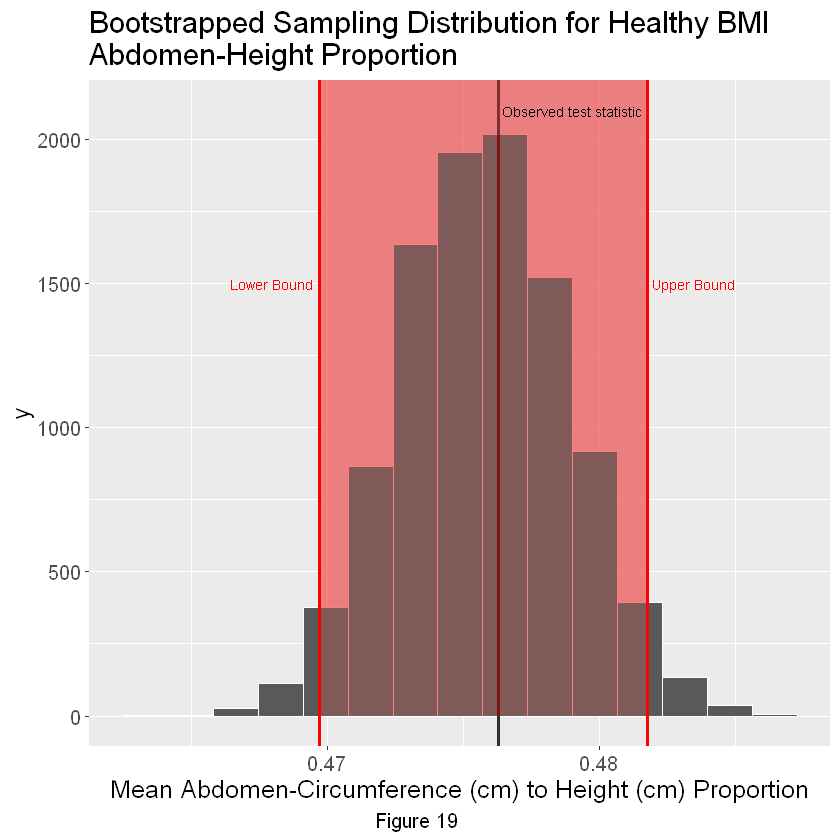

In [19]:
# plotting the sample bootsrap distribution from samp_dist_mean_prop_healthy

# resized size of plots for more effective visualization
options(repr.plot.width = 7, repr.plot.height = 7)

healthy_plot <- samp_dist_mean_prop_healthy |>
    ggplot() +
    geom_histogram(aes(x=stat), bins = 15, color = "white") +
    geom_vline(xintercept = 0.4762725, color = "black", alpha = 0.8, lwd = 1) + #x-intercept value is the mean abdomen-height proportion for the Healthy category from the function 'obs_test_stat'
    geom_vline(xintercept = 0.469731, color = "red", alpha =1, lwd = 1) +
    geom_vline(xintercept = 0.4817741, color = "red", alpha =1, lwd = 1) +
    geom_rect(aes(xmin = 0.469731, xmax = 0.4817741, ymin = 0, ymax = Inf), fill = 'red', alpha = 0.002) +
    labs(x = "Mean Abdomen-Circumference (cm) to Height (cm) Proportion", caption = "Figure 19                                                              ") +
    theme(text = element_text(size=15)) + 
    ggtitle("Bootstrapped Sampling Distribution for Healthy BMI \nAbdomen-Height Proportion")+
    annotate("text", x = 0.479, y = 2100, label = "Observed test statistic", color="black", size=3) +
    annotate("text", x = 0.468, y = 1500, label = "Lower Bound", color = "red", size = 3) +
    annotate("text", x = 0.4835, y = 1500, label = "Upper Bound", color = "red", size = 3) 

healthy_plot

In [20]:
# Using the infer package, bootstrap the mean abdomen circumference to height proportion in the overweight_sample data subset.
# Set the seed to 100 so that results are replicable each time the function in run to ensure consistency when the values are referred to in the written parts

set.seed(100)

samp_dist_mean_prop_overweight <- overweight_sample |>
    specify(response = abdomen_height_prop) |>
    generate(type = "bootstrap", reps = 10000) |>
    calculate(stat = "mean") 

head(samp_dist_mean_prop_overweight)

replicate,stat
<int>,<dbl>
1,0.5460223
2,0.5461585
3,0.5428806
4,0.5411204
5,0.5436410
6,0.5408250


**Figure 20**: overweight BMI group bootstrapped samples, sorted by replicate

In [21]:
# Using the infer package, generate the 95% confidence interval for the mean abdomen circumference to height proportion from samp_dist_mean_prop_overweight

overweight_bootstrapped_ci <- samp_dist_mean_prop_overweight |>
    get_ci()
overweight_bootstrapped_ci


lower_ci,upper_ci
<dbl>,<dbl>
0.5376404,0.5490167


**Figure 21:** 95% confidence intervals for the overweight bootstrapped samples

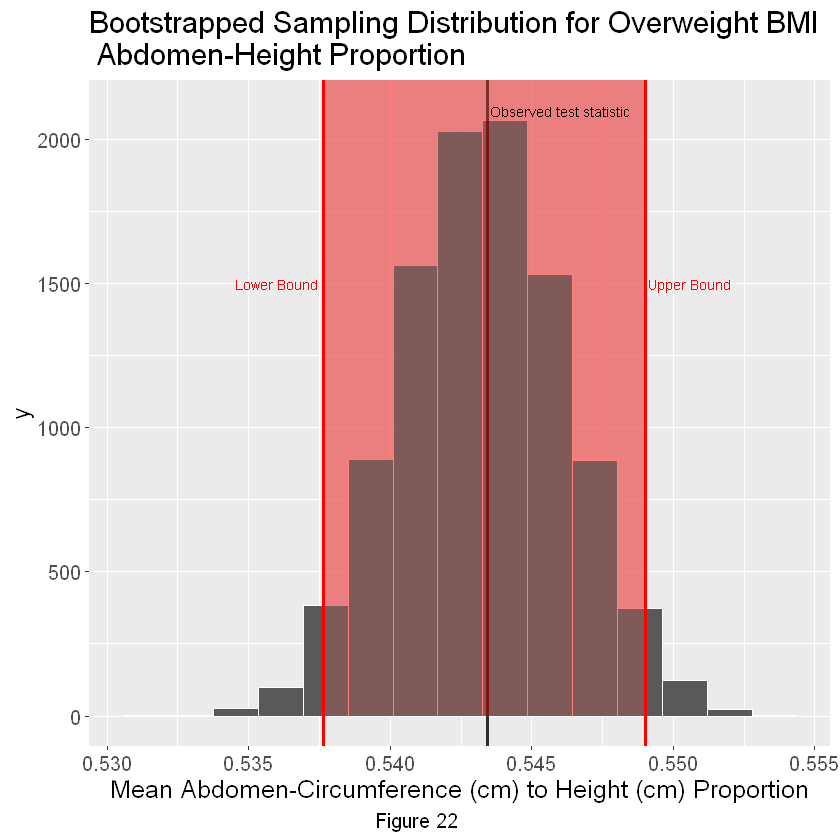

In [22]:
# plotting the sample bootsrap distribution from samp_dist_mean_overweight

# resized size of plots for more effective visualization
options(repr.plot.width = 7, repr.plot.height = 7)

overweight_plot <- samp_dist_mean_prop_overweight |>
    ggplot() +
    geom_histogram(aes(x=stat), bins = 15, color = "white") +
    geom_vline(xintercept = 0.5434341, color = "black", alpha = 0.8, lwd = 1) + #x-intercept value is the mean abdomen-height proportion for the Healhty category from the function 'obs_test_stat'
    geom_vline(xintercept = 0.5376404, color = "red", alpha =1, lwd = 1) +
    geom_vline(xintercept = 0.5490167, color = "red", alpha =1, lwd = 1) +
    geom_rect(aes(xmin = 0.5376404, xmax = 0.5490167, ymin = 0, ymax = Inf), fill = 'red', alpha = 0.002) + 
    labs(x = "Mean Abdomen-Circumference (cm) to Height (cm) Proportion", caption = "Figure 22                                                              ") +
    theme(text = element_text(size=15)) + 
    ggtitle("Bootstrapped Sampling Distribution for Overweight BMI \n Abdomen-Height Proportion")+
    annotate("text", x = 0.546, y = 2100, label = "Observed test statistic", color="black", size=3) +
    annotate("text", x = 0.536, y = 1500, label = "Lower Bound", color = "red", size = 3) +
    annotate("text", x = 0.5506, y = 1500, label = "Upper Bound", color = "red", size = 3) 

overweight_plot

In [23]:
# Here, calculate the difference in means (mean of abdomen circumference to height proportion) of the Healthy and Overweight BMI groups, respectively. 
# done with a 95% confidence interval

healthy <- samp_dist_mean_prop_healthy$stat

overweight <-  samp_dist_mean_prop_overweight$stat



diff_bootstrapped_means_ci <-  tibble (
        lower_ci = mean(overweight) - mean(healthy) - qnorm(0.975) * sqrt(var(overweight)/length(overweight) + var(healthy)/length(healthy)),
        upper_ci = mean(overweight) - mean(healthy) + qnorm(0.975) * sqrt(var(overweight)/length(overweight) + var(healthy)/length(healthy))
    )
    
diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.05923747,0.075918


**Figure 23**: difference in means between the bootstrapped healthy and overweight groups

## Asymptotics vs. Bootstrapping

The confidence interval produced by both the asymptotics method (Figure 17) and the bootstrapping method (Figure 23) was very similar. The confidence interval for the bootstrapped sample (Figure 23) was slightly narrower than that of the asymptotics sample. This could be seen as an advantage as the range of values within which we are 95% confident that the true difference in means lies is smaller, which means that the outer bounds of the bootstrapped interval are closer to the true value compared to the outer bounds of the non-bootstrapped interval. This puts us in the risk of committing a Type I error. On the other hand, the larger interval of the asymptotics interval (Figure 17) could also be seen as advantageous, as it is a more conservative approach to the risk of committing a Type II error. Also noteworthy is that the slight difference in the confidence interval between the two methods is mainly due to difference in sample size. The bootstrapped sample has a much larger sample size, which is bound to produce a smaller interval. With this in mind, it is possible that the difference in intervals is not statistically significant. 

Ultimately, the results produced in both methods support a rejection of the null hypothesis, it can be said that there is a difference in the means between the two groups, under the assumption that the sample from the original dataset is representative of the population. 




## Discussion

Using asymptotics, a two-sample t-test is conducted to evaluate the difference in means (mean of abdomen circumference to height proportion) between men in the healthy and overweight BMI categories. The p-value was 4.069488e-37, which was lower than our selected significance level of 5%, meaning that we could reject the null hypothesis. Furthermore, the 95% confidence interval range for the difference in means did not include 0, further supporting the alternative hypothesis that there is a difference in means between the healthy BMI and overweight BMI men in South Dakota, the population of interest. Given that the original dataset (Figure 1) was only a sample, bootstrapping is used to obtain the distribution of the mean for each population (Figure 17 and Figure 22). Using the bootstrapped distribution, we calculated the difference in means with a 95% confidence interval (Figure 23). Both methods supported the alternative hypothesis and produced very similar confidence intervals. The advantages of each were discussed above in Methods. 

The implications of these findings can contribute to finding a more accurate and accessible way of diagnosing weight status (healthy, overweight, obese). The current standard of BMI is not always accurate, but one advantage of calculating the proportion of the abdomen circumference to the height is that men store the majority of excess fat in their abdomen, and abdomen circumference has a high correlation to body fat percentage, which is the golden standard for diagnosing obesity. This also is favorable to BMI in that BMI relies on weight, but does not account for fat distribution, muscle mass, and bone density. These factors are not as influential if at all for our proportion. 

The objective and findings of this investigation could be extended to further exploring the proportion that we used to see if our results are replicable, and also whether the correlation stands true for men in different populations. Furthermore, other methods for diagnosing obesity using measurements that are still accessible but more accurate than BMI could be explored. Future studies can apply this objective with women, altering the variables of interest by determining where women store excess fat in their body proportions. If successful in finding and confirming such a method, it will be easier and more accessible to have a better sense of health relative to body fat, even with limited resources. This allows the patient to move one step closer to leading a more informed and healthy lifestyle. 

## References


Centers for Disease Control and Prevention. (2022, Feb 3). Calculating BMI Using the
English System. https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/
bmiage/page5_2.html. 

Centers for Disease Control and Prevention. (2022, June 3). Defining Adult Overweight
and Obesity. https://www.cdc.gov/obesity/basics/adult-defining.html

European Association for the Study of Obesity. (2018). Obesity Statistics: World Health
Organization (Fact Sheet N°311). EASO. https://easo.org/media-portal/statistics/ 

How to measure body fatness. (n.d.) Harvard T.H. Chan School of Public Health.
https://columbiacollege-ca.libguides.com/apa/websites#Webpage_3. 

Juntaping, K. (2017). Relationship between Height-Weight Difference Index and Body-Fat
Percentage Estimated by Bioelectrical Impedance Analysis in Thai Adults. Scientific
World Journal. 2017(2), 1-8. 
          https://doi.org/10.1155/2017/7258607

Mayo Foundation for Medical Education and Research. (2021, September 2). Obesity. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/obesity/symptoms-causes/syc-20375742

Raloff, J. (2006, Apr 21). Do People Know When They’re Overweight? Science
News. https://www.sciencenews.org/blog/food-for-thought/do-people-know-when
-theyre-overweight 

Roger W. Johnson. (2021). Body Fat Prediction Dataset. [Dataset]. Kaggle. Retrieved from March 18, 2023 from https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

Snijder, M., van Dam, R., Visser, M., & Seidell, J. (2006). What aspects of body fat are particularly hazardous and how do we measure them?. International Journal of Epidemiology, 35(1), 83-92. https://doi.org/10.1093/ije/dyi253

United States Census Bureau. (2022, Dec 8). American Community Survey 5-Year Data
(2009-2021). https://www.census.gov/data/developers/data-sets/acs-5year.html

Centers for Disease Control and Prevention. (2022, June 3). Defining Adult Overweight
and Obesity. https://www.cdc.gov/obesity/basics/adult-defining.html

Centers for Disease Control and Prevention. (2022, Feb 3). Calculating BMI Using the
English System. https://www.cdc.gov/nccdphp/dnpao/growthcharts/training/
bmiage/page5_2.html. 

United States Census Bureau. (2022, Dec 8). American Community Survey 5-Year Data
(2009-2021). https://www.census.gov/data/developers/data-sets/acs-5year.html

Raloff, J. (2006, Apr 21). Do People Know When They’re Overweight? Science
News. https://www.sciencenews.org/blog/food-for-thought/do-people-know-when
-theyre-overweight 

Juntaping, K. (2017). Relationship between Height-Weight Difference Index and Body-Fat
Percentage Estimated by Bioelectrical Impedance Analysis in Thai Adults. Scientific
World Journal. 2017(2), 1-8. https://doi.org/10.1155/2017/7258607

European Association for the Study of Obesity. (2018). Obesity Statistics: World Health
Organization (Fact Sheet N°311). EASO. https://easo.org/media-portal/statistics/ 

How to measure body fatness. (n.d.) Harvard T.H. Chan School of Public Health.
https://columbiacollege-ca.libguides.com/apa/websites#Webpage_3. 
